# Atelier Pratique Apprentissage non supervisé 2

In [298]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)#np.nan
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


## I. Réduction de dimensions et Visualisation des données

### A - Villes

In [299]:
villes = pd.read_csv('/Users/komlan/Project_M2/Algo_Big_Data/Data/villes.csv', sep=';')
print("Taille", villes.shape)
villes.head()

Taille (32, 13)


,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = villes.iloc[:, 1:13].values
labels = villes.iloc[:, 0].values
#Normalisation et application du PCA
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
pca_v = PCA().fit(X_norm)
X_pca_v = pca_v.transform(X_norm)
print(pca_v.explained_variance_ratio_)

[8.72681935e-01 1.17206018e-01 4.69562816e-03 2.64791321e-03
 1.13528034e-03 5.01361084e-04 4.22889550e-04 3.28173500e-04
 1.51658537e-04 1.17643729e-04 8.36434653e-05 2.78555007e-05]


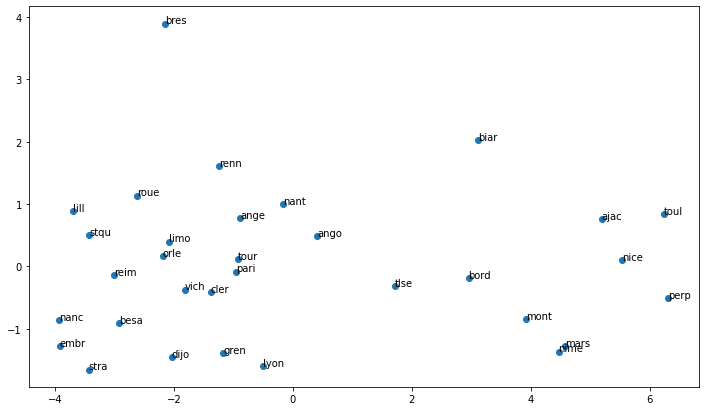

In [301]:
plt.figure(figsize=(12, 7))
plt.scatter(X_pca_v[:, 0], X_pca_v[:, 1])
for label, x, y in zip(labels, X_pca_v[:, 0], X_pca_v[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Minimum axe to conserve 70% of informations

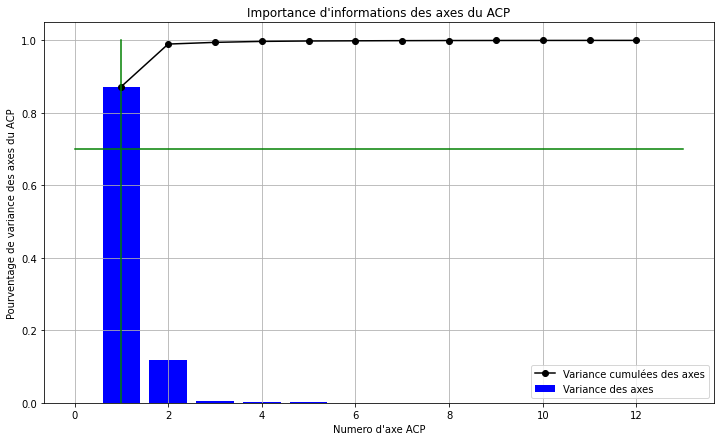

In [254]:
rate = 0.70
x = list(range(1,13))
y = pca_v.explained_variance_ratio_
info_gain = np.cumsum(pca_v.explained_variance_ratio_)

#Get the minimum axe corresponding to 70%
def get_min_axe(rate, X, Y):
    for x, y in zip(X,Y):
        if rate < y:
            return x
x_min = get_min_axe(rate, x, info_gain)

#Plot 
plt.figure(figsize=(12, 7))
plt.plot(x, info_gain, '-', label='Variance cumulées des axes', marker='o', color='black')
plt.bar(x, y, label='Variance des axes', color='blue')
plt.plot([min(x)-1, max(x)+1], [rate, rate], color='green')
plt.plot([x_min, x_min], [0,1], color='green')
plt.legend()
plt.grid()
plt.xlabel("Numero d\'axe ACP")
plt.ylabel("Pourventage de variance des axes du ACP")
plt.title("Importance d\'informations des axes du ACP")
plt.show()

In [255]:
# Les deux premiers axes
print(np.cumsum(pca_v.explained_variance_ratio_))
pca_v_1 = PCA(0.9898).fit(X_norm)
print("Nombre d'axes", pca_v_1.n_components_)

[0.87268193 0.98988795 0.99458358 0.99723149 0.99836677 0.99886814
 0.99929103 0.9996192  0.99977086 0.9998885  0.99997214 1.        ]
Nombre d'axes 2


### Interprétations

--> Le nombre d'axe nécessaire pour garder un minimum de 70% d'information est: 1

-->Les deux premières axes seulement correspondent à presque la totalité de l\'information à 98.98 %

### B- Crimes

In [256]:
crimes = pd.read_csv('/Users/komlan/Project_M2/Algo_Big_Data/Data/crimes.csv', sep=';')
print("Taille", crimes.shape)
crimes.head()

Taille (50, 8)


,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [257]:
X = crimes.iloc[:, 1:7].values
labels = crimes.iloc[:, 0].values
#Normalisation et application du PCA
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
pca_c = PCA().fit(X_norm)
X_pca_c = pca_c.transform(X_norm)
print(pca_c.explained_variance_ratio_)

[0.63698553 0.17606859 0.08101992 0.04689937 0.03709174 0.02193486]


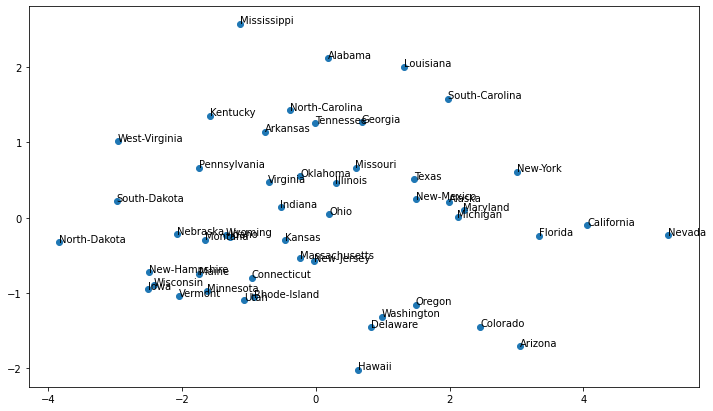

In [258]:
plt.figure(figsize=(12, 7))
plt.scatter(X_pca_c[:, 0], X_pca_c[:, 1])
for label, x, y in zip(labels, X_pca_c[:, 0], X_pca_c[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Minimum axe to conserve 70% of informations

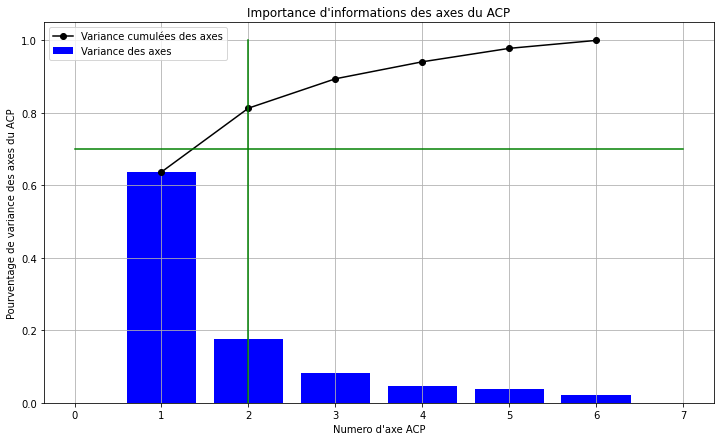

In [259]:
rate = 0.70
x = list(range(1,7))
y = pca_c.explained_variance_ratio_
info_gain = np.cumsum(pca_c.explained_variance_ratio_)

#Get the minimum axe corresponding to 70%
def get_min_axe(rate, X, Y):
    for x, y in zip(X,Y):
        if rate < y:
            return x
x_min = get_min_axe(rate, x, info_gain)

#Plot 
plt.figure(figsize=(12, 7))
plt.plot(x, info_gain, '-', label='Variance cumulées des axes', marker='o', color='black')
plt.bar(x, y, label='Variance des axes', color='blue')
plt.plot([min(x)-1, max(x)+1], [rate, rate], color='green')
plt.plot([x_min, x_min], [0,1], color='green')
plt.legend()
plt.grid()
plt.xlabel("Numero d\'axe ACP")
plt.ylabel("Pourventage de variance des axes du ACP")
plt.title("Importance d\'informations des axes du ACP")
plt.show()

In [260]:
# Les deux premiers axes
print(np.cumsum(pca_c.explained_variance_ratio_))

[0.63698553 0.81305411 0.89407403 0.9409734  0.97806514 1.        ]


### Interprétations

--> Le nombre d'axe nécessaire pour garder un minimum de 70% d'information est: 2

-->Les deux premières axes seulement correspondent à presque la totalité de l\'information à 81.305 %

## II- Clustering

### 1. K-Means

In [261]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca_v)

Prédiction [1 3 3 0 1 1 2 3 0 0 3 0 0 3 1 1 0 3 1 1 0 3 1 0 3 0 0 0 1 3 3 0]


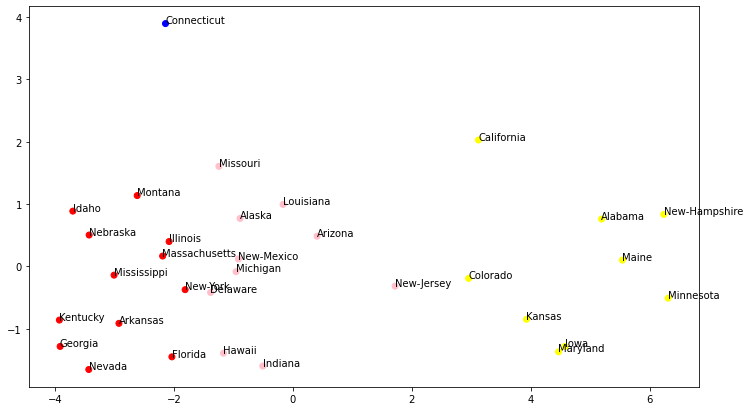

In [262]:
def plot_clustering(X, labels, prediction):
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 7))
    plt.scatter(X[:, 0], X[:, 1], c= prediction, cmap=mcolors.ListedColormap(colors))
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
print("Prédiction", kmeans.labels_)
plot_clustering(X_pca_v, labels, kmeans.labels_)

### 2. Agglomerative Clustering with Ward

Prédiction [0 2 2 1 0 0 1 2 2 1 2 1 1 2 0 0 1 2 0 0 1 2 0 1 2 1 1 1 0 0 2 2]


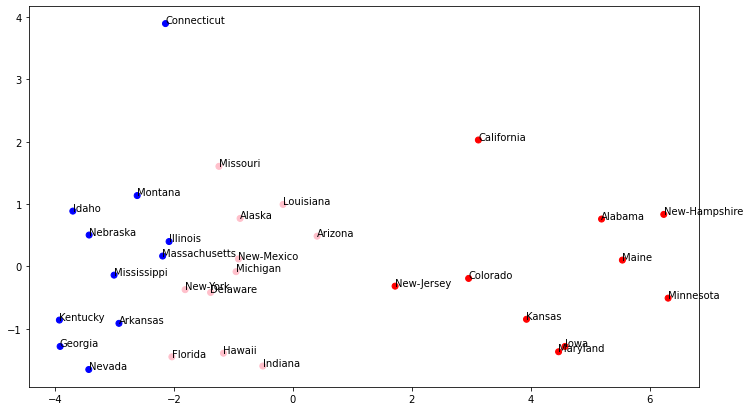

In [263]:
from sklearn.cluster import AgglomerativeClustering
agglo_ward = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3)
agglo_ward.fit(X_pca_v)
print("Prédiction", agglo_ward.labels_)
plot_clustering(X_pca_v, labels, agglo_ward.labels_)

### 3. Agglomerative Clustering with Average

Prédiction [0 1 1 1 0 0 2 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1]


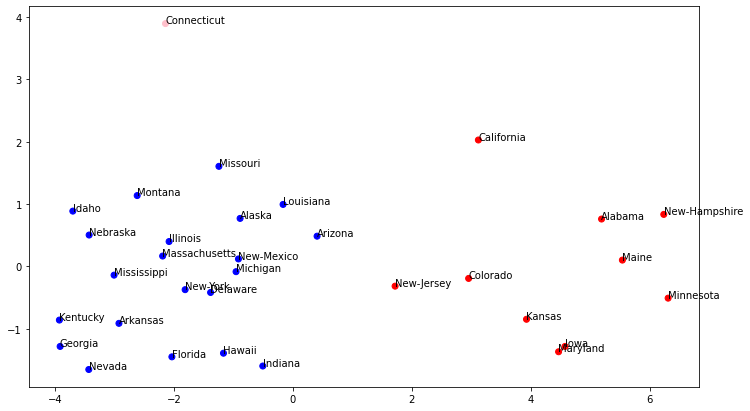

In [264]:
agglo_average = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None, n_clusters=3)
agglo_average.fit(X_pca_v)
print("Prédiction", agglo_average.labels_)
plot_clustering(X_pca_v, labels, agglo_average.labels_)

### 4. Meilleurs valeur de K pour le K-Means

In [265]:
from sklearn import metrics
K = np.arange(2, 6)
for i in K:
    clustering = KMeans(n_clusters=i).fit_predict(X_pca_v)
    print(metrics.silhouette_score(X_pca_v, clustering, metric='euclidean'))
    print()

0.625557719180767

0.38809425947195875

0.39249385306689244

0.3265311905820172



### Commentaire

Le nombre de cluster correspondant au meilleur score est donc à 2. 

Ce qui donne un meilleur score de silhouette à 0.625

### Méthode d'Elbow

In [290]:
from scipy.spatial import distance
# Choosing optimal K
def compute_elbow(X, K):
    distortions = []
    inertias = []
    for cluster in K:
        clustering = KMeans(n_clusters=i).fit(X)
        distortions.append(sum(np.min(distance.cdist(X, clustering.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
        inertias.append(clustering.inertia_)
    return distortions, inertias

distortions, inertias = compute_elbow(X_pca_v, K)

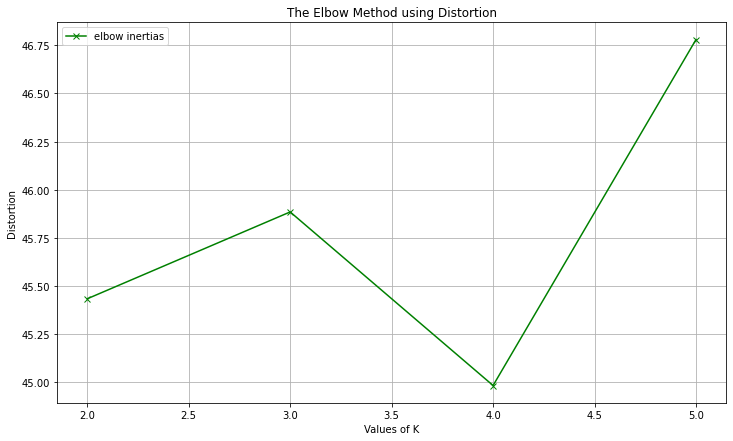

In [297]:
plt.figure(figsize=(12, 7))
plt.plot(K, inertias , 'bx-', label='elbow inertias', color='green')
#plt.plot(K, distortions , 'bx-', label='elbow distortions', color='blue')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.legend()
plt.grid()
plt.title('The Elbow Method using Distortion')
plt.show()

### Commentaire 
Visiblement pas de point d'inflexion permettant de définir la meilleur valeur de K avec Elbow